# Mini project - Air BNB
This miniproject will look into what determines the *price* an a **spare room** in a New York city apartement.


# creating envioronment
1. in terminal run to create enviornment
    1. python -m venv venv
    2. venv\Scripts\activate 
    3. pip install pandas matplotlib seaborn jupyter plotly sci-learn
    4. python -m ipykernel install --user --name=venv
2. choose venv in this file for the correct environment

In [868]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# The DS process
- Define the goal
- Collect and manage data
- Build the model
- Evaluate and critique the model
- Present results and document
- Deploy model


## Define the goal
The goal in mind is finding out what factors determines the price on a spare room. What factors can one easily change,  like how fast the one listing the house respond, description,host hast a profile picture,thumbnail,cancellation policy. 

- What effects the price  for **private room** listings, and what can the host do to increase price.



 
### Goal
- How much should we charge for our spare room?
- can we increase the price for our spare room
- Increase the price by 0.5 log

### Hypothesis of things that may affect price
- More amenities increases price
- Higer host response rate increases the price
- instant bookable increases price
- Better reviews increase price

### DS cycle
- In the DS cycle the *sponsor* then is the future/new Airbnb host. 
- The *client* then is the users of Airbnb aswell as the host.

# Data collection and managment

- What data is available?
- Can an increase in price come from theese?
- Data quality

To avoid garbage output, first step is to clean the input so no garbage will be in the input.

### Load in Dataset

In [869]:
df = pd.read_csv('Airbnb_Data.csv')

### Inspect data

In [870]:
df.head(1)

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0


In [871]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

#### Stats

In [872]:
df.describe()           

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


Explore how many diffrent *ids* there are.

Then loop trough the columns rows to find the number of diffrent objects.

In [873]:
print("Number of ids: ",df.id.nunique())
for col in df.select_dtypes(include=['object']).columns:
    print(col, df[col].nunique())

Number of ids:  74111
property_type 35
room_type 3
amenities 67122
bed_type 5
cancellation_policy 5
city 6
description 73479
first_review 2554
host_has_profile_pic 2
host_identity_verified 2
host_response_rate 80
host_since 3087
instant_bookable 2
last_review 1371
name 73359
neighbourhood 619
thumbnail_url 65883
zipcode 769


In [874]:
for col in ['city','cancellation_policy','host_has_profile_pic','host_identity_verified','property_type','room_type','bed_type']:
    print(col, df[col].unique(),"\n")

city ['NYC' 'SF' 'DC' 'LA' 'Chicago' 'Boston'] 

cancellation_policy ['strict' 'moderate' 'flexible' 'super_strict_30' 'super_strict_60'] 

host_has_profile_pic ['t' nan 'f'] 

host_identity_verified ['t' 'f' nan] 

property_type ['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island'] 

room_type ['Entire home/apt' 'Private room' 'Shared room'] 

bed_type ['Real Bed' 'Futon' 'Pull-out Sofa' 'Couch' 'Airbed'] 



In our scenario we  have a spare room, which we have 30638 availible in the dataset.

In [875]:
print(df['room_type'].value_counts())

room_type
Entire home/apt    41310
Private room       30638
Shared room         2163
Name: count, dtype: int64


## Focus on Private room in NYC

Filter *room_type* on *private room*

In [876]:
df_private = df[df['room_type'] == "Private room"]
df_nyc_private = df_private[df_private['city'] == 'NYC'].copy()
df_nyc_private = df_nyc_private[df_nyc_private['property_type'] =='Apartment']
for col in ['city','cancellation_policy','host_has_profile_pic','host_identity_verified','room_type','bed_type']:
    print(col, df_nyc_private[col].value_counts(),"\n")

city city
NYC    12627
Name: count, dtype: int64 

cancellation_policy cancellation_policy
flexible    4852
strict      4702
moderate    3073
Name: count, dtype: int64 

host_has_profile_pic host_has_profile_pic
t    12506
f       35
Name: count, dtype: int64 

host_identity_verified host_identity_verified
t    7811
f    4730
Name: count, dtype: int64 

room_type room_type
Private room    12627
Name: count, dtype: int64 

bed_type bed_type
Real Bed         12209
Futon              191
Pull-out Sofa      112
Airbed              96
Couch               19
Name: count, dtype: int64 



### Drop columns
Decide to drop columns *bedtype* since majority have a real bed, drop *host has profile pic* aswell as only 90 doesnt have one. 

In [877]:
df_nyc_private.drop(['id','bed_type','host_has_profile_pic'],axis=1,inplace=True)

## Missing values
Remove values that are reasonble to remove. e.g *Bathrooms* na and *neighbourhood*, and *bedrooms* can reasonbly be **removed**.

However *host_identity_verified* and *first_review*, *thumbnail_url* probebly means that there is no data or false. 

The na on *review_scores_rating* is probably that no one have reviewed that host yet. 

In [878]:
# na or missing values
for col in df_nyc_private:
    if df_nyc_private[col].isna().sum() > 0:
        print(col,"\nna: ", df_nyc_private[col].isna().sum())
        print("null: ",df_nyc_private[col].isnull().sum(),"\n")

bathrooms 
na:  52
null:  52 

first_review 
na:  3118
null:  3118 

host_identity_verified 
na:  86
null:  86 

host_response_rate 
na:  4328
null:  4328 

host_since 
na:  86
null:  86 

last_review 
na:  3108
null:  3108 

neighbourhood 
na:  1
null:  1 

review_scores_rating 
na:  3351
null:  3351 

thumbnail_url 
na:  1018
null:  1018 

zipcode 
na:  166
null:  166 

bedrooms 
na:  7
null:  7 

beds 
na:  36
null:  36 



### Handeling data and missing values
Missing or na values within **bathrooms** , **bedrooms**, **beds**, **host_since** and **neighbourhood** will be removed. 

Missing or na values in **host_identity_verified** will be set to f for false 

For **review_scores_rating** , create additional column for no reviews.

Change **thumbnail_url** to new column, thumbnail bool

**last_review**,**first_review** and **zipcode** might be dropped later since we already have reviews and location.

Change host **response rate** to float from object

In [879]:
# drop rows containing unreasonble na cells. Total 100 rows dropped.
df_nyc_private = df_nyc_private.dropna(subset=['bathrooms','bedrooms','beds','host_since','neighbourhood'])
# host_identity_verified is reasonbly not na or null but false, change to f
df_nyc_private['host_identity_verified'] = df_nyc_private['host_identity_verified'].fillna('f')

# Host has no thumbnail, True/false instead
df_nyc_private['thumbnail_url'] = (~df_nyc_private['thumbnail_url'].isna()).astype(int)

# New column for no reviews
df_nyc_private['review_scores'] = (~df_nyc_private['review_scores_rating'].isna()).astype(int)

# first/last review null same as no review
df_nyc_private = df_nyc_private.drop(['first_review','last_review'],axis=1)

# Drop columns:zipcode as we already have long and lat, drop city,room_type,property_type as we already specify nyc, drop name and description 
df_nyc_private = df_nyc_private.drop(['zipcode','city','name','description','room_type','property_type'],axis=1)


# remove % from response rate
df_nyc_private['host_response_rate'] = df_nyc_private['host_response_rate'].str.replace('%','').astype(float)
df_nyc_private.info()
df_nyc_private.head()
#df_nyc_private.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 12464 entries, 10 to 74106
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   log_price               12464 non-null  float64
 1   amenities               12464 non-null  object 
 2   accommodates            12464 non-null  int64  
 3   bathrooms               12464 non-null  float64
 4   cancellation_policy     12464 non-null  object 
 5   cleaning_fee            12464 non-null  bool   
 6   host_identity_verified  12464 non-null  object 
 7   host_response_rate      8243 non-null   float64
 8   host_since              12464 non-null  object 
 9   instant_bookable        12464 non-null  object 
 10  latitude                12464 non-null  float64
 11  longitude               12464 non-null  float64
 12  neighbourhood           12464 non-null  object 
 13  number_of_reviews       12464 non-null  int64  
 14  review_scores_rating    9151 non-null   fl

,log_price,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,host_since,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,bedrooms,beds,review_scores
10,4.605170,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,strict,True,t,100.0,2013-03-27,f,40.723883,-73.983880,Alphabet City,82,93.0,1,1.0,1.0,1
29,4.653960,"{TV,Internet,""Wireless Internet"",""Air conditio...",3,1.0,strict,True,f,68.0,2016-03-06,f,40.750355,-73.980828,Murray Hill,40,88.0,1,1.0,2.0,1
30,4.317488,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",2,1.0,strict,True,t,67.0,2014-01-06,f,40.661221,-73.948667,Lefferts Garden,1,100.0,1,1.0,1.0,1
35,4.382027,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2,1.0,moderate,True,t,90.0,2012-08-07,t,40.659219,-73.913513,Brownsville,17,96.0,1,1.0,1.0,1
37,3.912023,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1,1.0,strict,True,f,86.0,2013-11-19,f,40.715183,-73.945200,Williamsburg,11,84.0,1,1.0,1.0,1


In [880]:
# , seperates to amenities to string
df_nyc_private['amenities'] = (
    df_nyc_private['amenities']
    .str.replace(r'[\{\}"]', '', regex=True)   
    .str.split(',')                           
)

# amenity_counts = (
#     df_nyc_private['amenities']
#     .explode()
#     .str.strip()
#     .value_counts()
# )
# amenity_counts.head(25)

In [881]:
# 
common_amenities = df_nyc_private['amenities'].explode().value_counts().head(15).index.to_list()

for amenity in common_amenities:
    col_name = 'amanity ' + amenity
    df_nyc_private[col_name] = df_nyc_private['amenities'].apply(lambda x: int(amenity in x))

df_nyc_private.head() 

,log_price,amenities,accommodates,bathrooms,cancellation_policy,cleaning_fee,host_identity_verified,host_response_rate,host_since,instant_bookable,...,amanity Smoke detector,amanity Hangers,amanity Carbon monoxide detector,amanity Shampoo,amanity TV,amanity Internet,amanity Laptop friendly workspace,amanity Hair dryer,amanity Iron,amanity translation missing: en.hosting_amenity_50
10,4.605170,"[Internet, Wireless Internet, Air conditioning...",2,1.0,strict,True,t,100.0,2013-03-27,f,...,1,1,0,0,0,1,1,1,0,1
29,4.653960,"[TV, Internet, Wireless Internet, Air conditio...",3,1.0,strict,True,f,68.0,2016-03-06,f,...,0,1,0,1,1,1,1,1,1,1
30,4.317488,"[TV, Cable TV, Internet, Wireless Internet, Ai...",2,1.0,strict,True,t,67.0,2014-01-06,f,...,1,1,1,1,1,1,1,1,1,0
35,4.382027,"[TV, Cable TV, Wireless Internet, Air conditio...",2,1.0,moderate,True,t,90.0,2012-08-07,t,...,1,0,1,1,1,0,0,0,1,0
37,3.912023,"[TV, Wireless Internet, Air conditioning, Kitc...",1,1.0,strict,True,f,86.0,2013-11-19,f,...,1,1,1,1,1,0,1,1,1,0


# Visualisation


### Histogram for numeric values

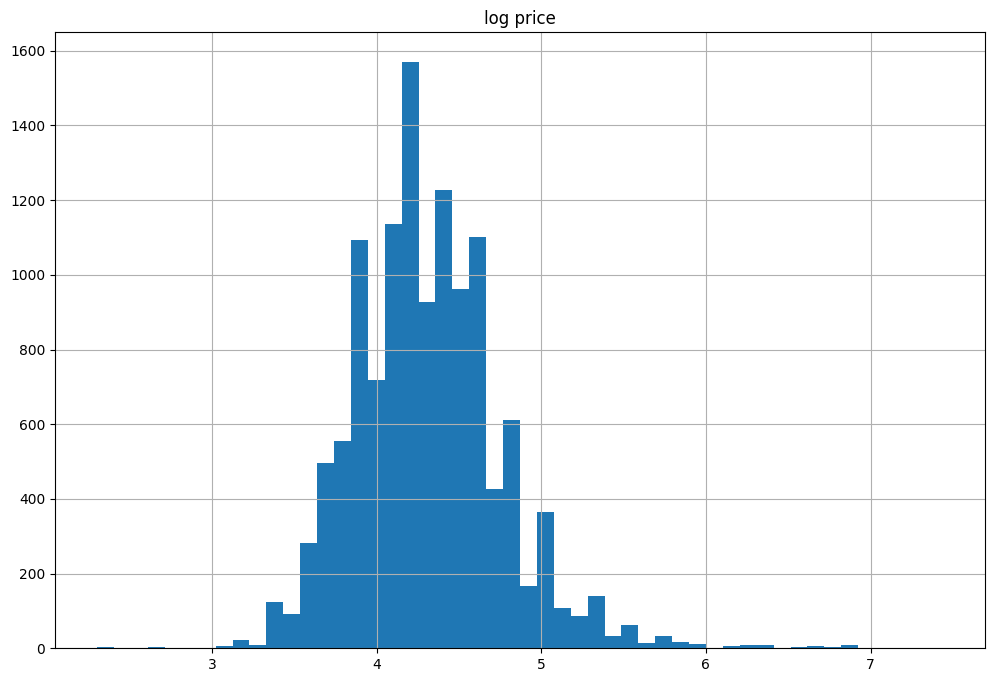

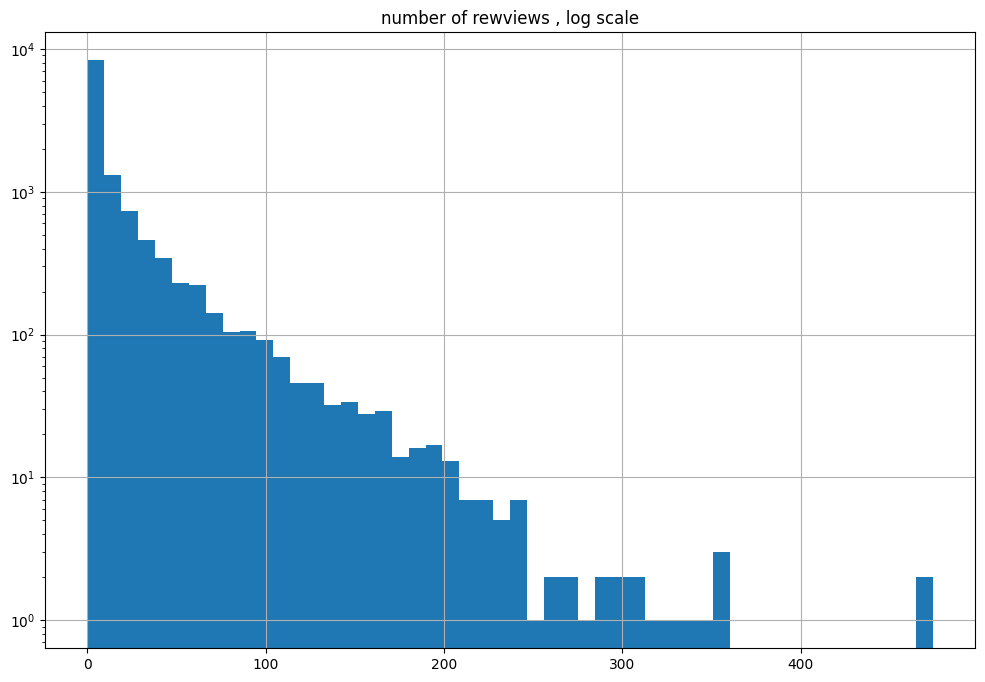

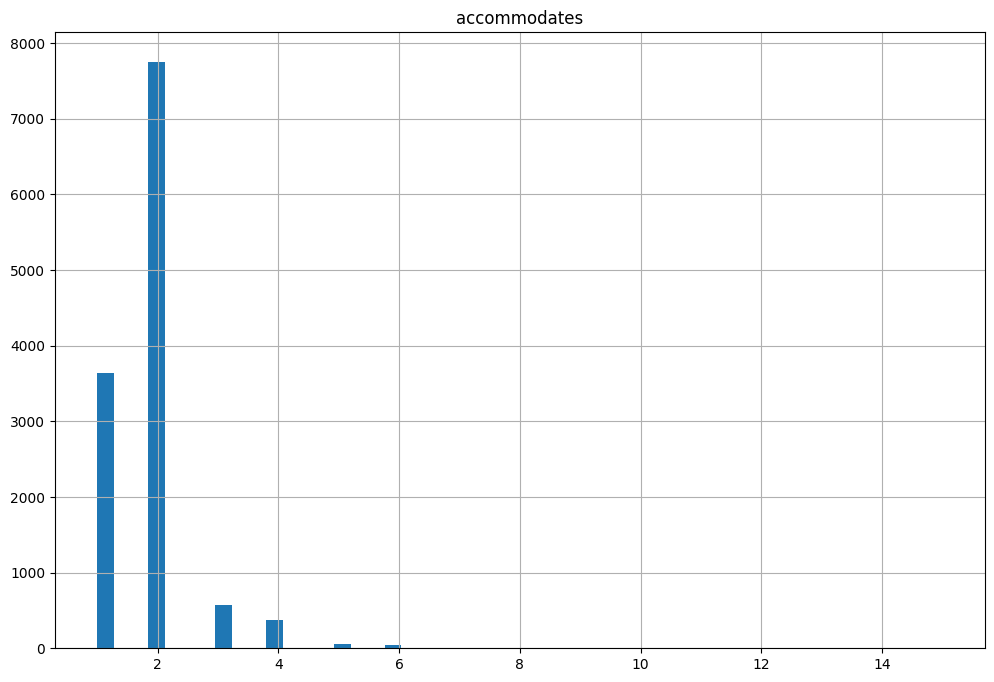

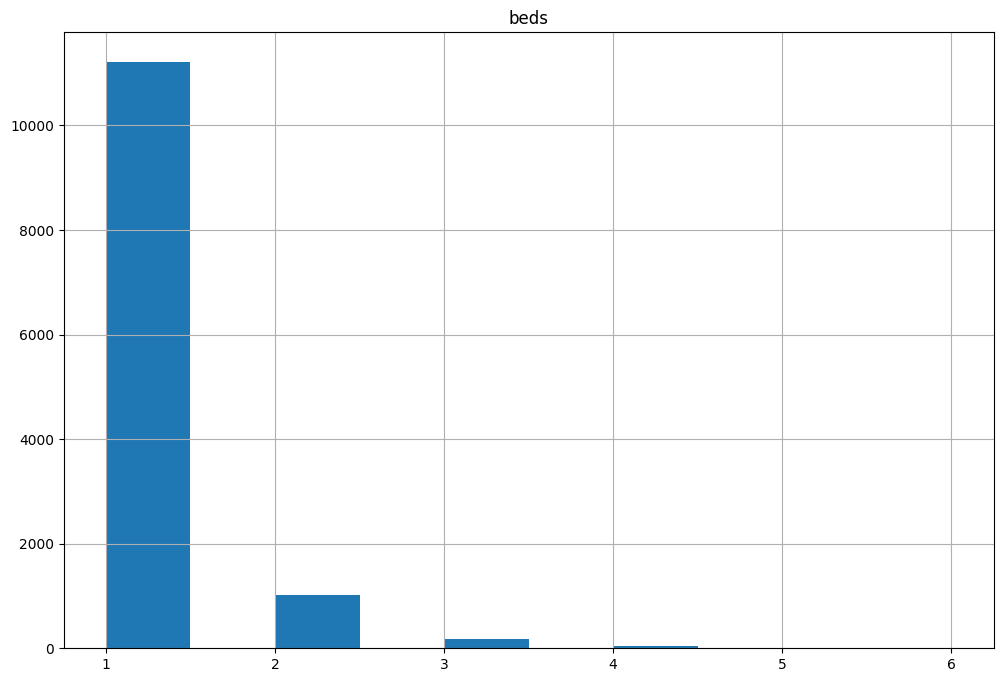

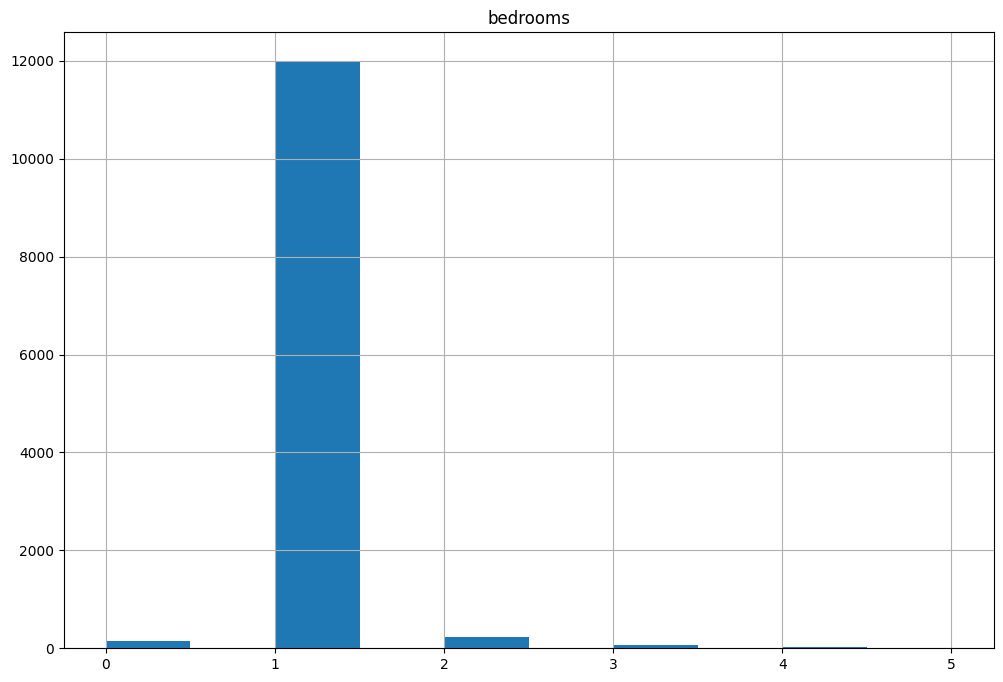

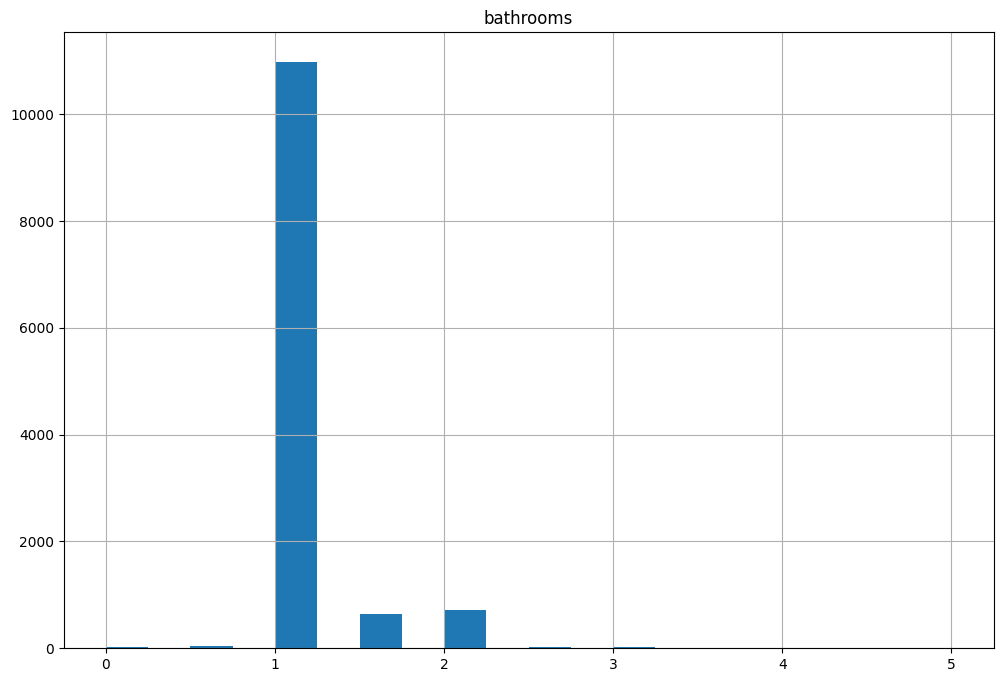

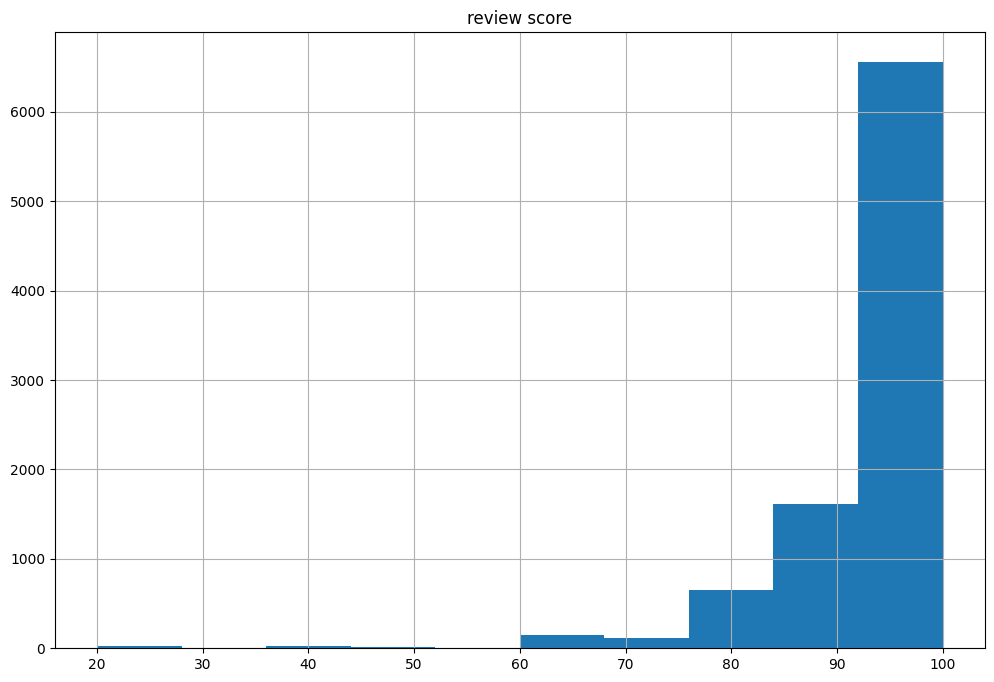

In [882]:
plt.figure(figsize=(12,8))
df_nyc_private['log_price'].hist(bins=50)
plt.title('log price')
plt.show()

plt.figure(figsize=(12,8))
df_nyc_private['number_of_reviews'].hist(bins=50)
plt.yscale('log')
plt.title('number of rewviews , log scale')
plt.show()

plt.figure(figsize=(12,8))
df_nyc_private['accommodates'].hist(bins=50)
plt.title('accommodates')
plt.show()

plt.figure(figsize=(12,8))
df_nyc_private['beds'].hist()
plt.title('beds')
plt.show()

plt.figure(figsize=(12,8))
df_nyc_private['bedrooms'].hist()
plt.title('bedrooms')
plt.show()

plt.figure(figsize=(12,8))
df_nyc_private['bathrooms'].hist(bins=20)
plt.title('bathrooms')
plt.show()

plt.figure(figsize=(12,8))
df_nyc_private['review_scores_rating'].hist()
plt.title('review score')
plt.show()



### countplot for categorical values

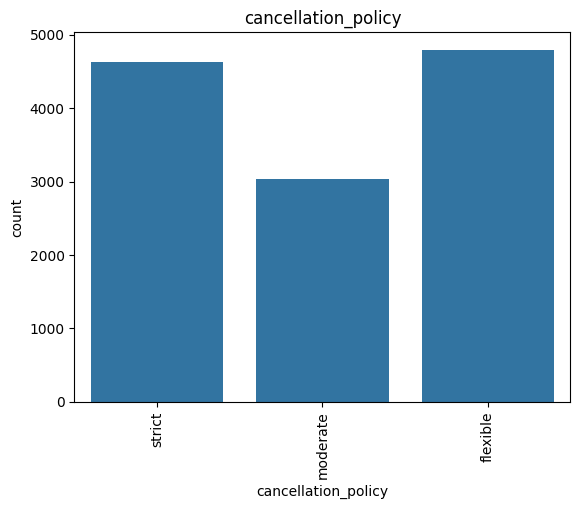

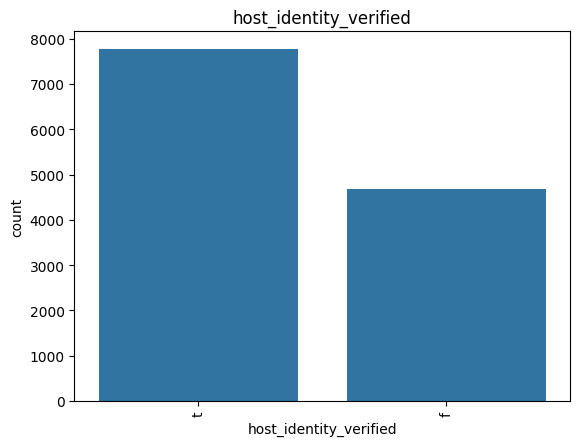

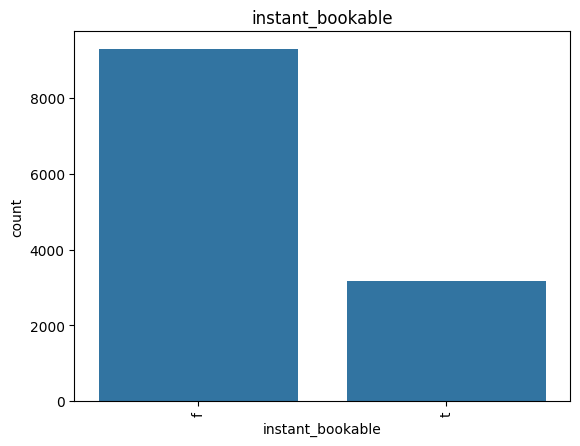

In [883]:

for col in [ 
'cancellation_policy' ,
'host_identity_verified' ,
'instant_bookable']:
    sns.countplot(data=df_nyc_private,x=col)
    plt.title(col)
    plt.xticks(rotation=90)
    plt.show()



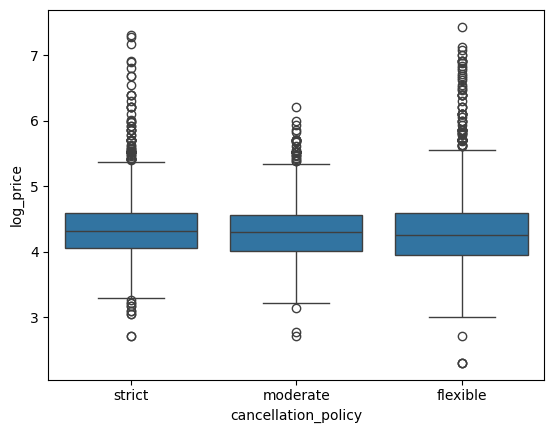

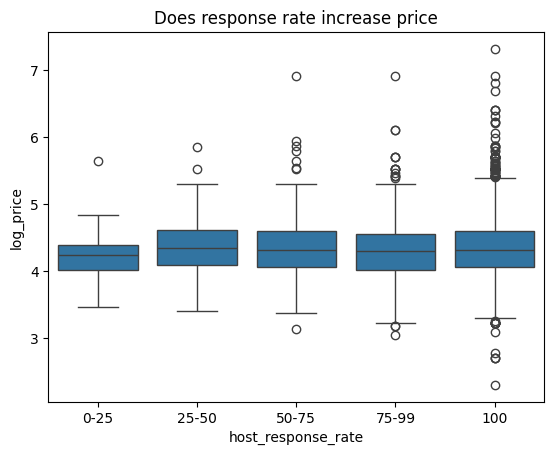

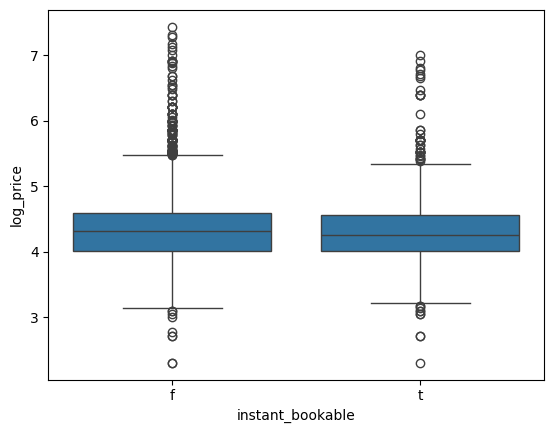

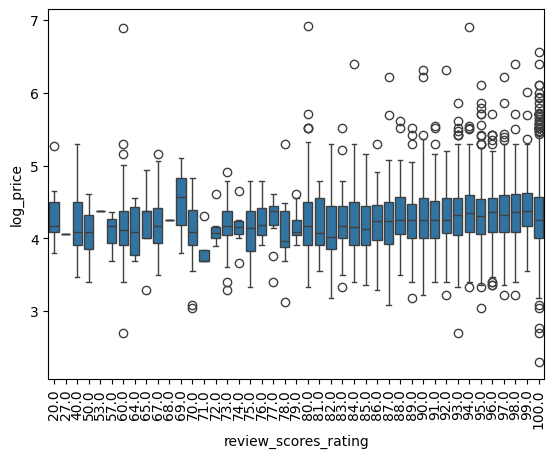

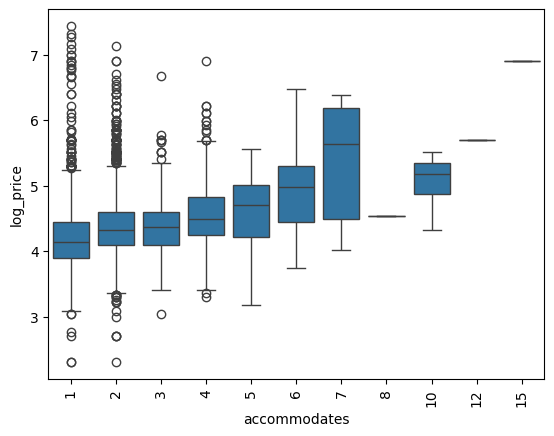

In [884]:
sns.boxplot(data=df_nyc_private,x='cancellation_policy',y='log_price')
plt.show()


sns.boxplot(data=df_nyc_private,x=pd.cut(df_nyc_private['host_response_rate'],bins=[0,25,50,75,99,100],labels=['0-25','25-50','50-75','75-99','100']
),y='log_price')


plt.title('Does response rate increase price')
plt.show()


sns.boxplot(data=df_nyc_private,x='instant_bookable',y='log_price')
plt.show()


sns.boxplot(data=df_nyc_private,x='review_scores_rating',y='log_price')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df_nyc_private,x='accommodates',y='log_price')
plt.xticks(rotation=90)
plt.show()



In [885]:
df_nyc_private['neighbourhood'].value_counts()


neighbourhood
Williamsburg          1337
Bedford-Stuyvesant     982
Bushwick               966
Harlem                 667
Crown Heights          484
                      ... 
City Island              1
Randall Manor            1
Marine Park              1
Howard Beach             1
Manhattan Beach          1
Name: count, Length: 162, dtype: int64

### Heatmap plot

<Axes: >

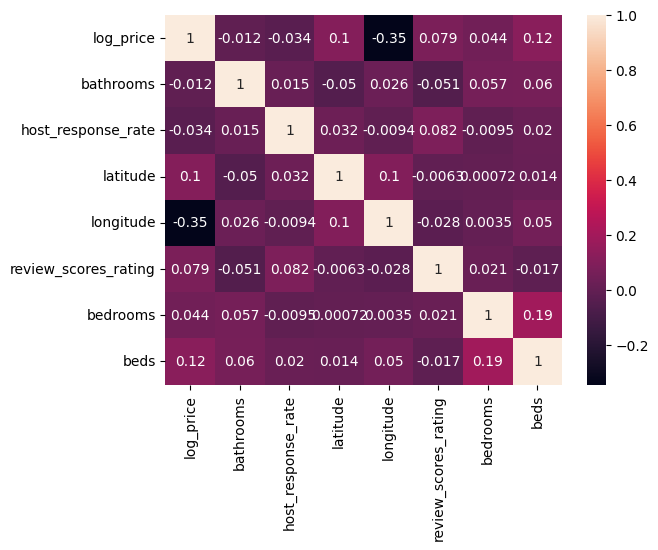

In [886]:
sns.heatmap(df_nyc_private.select_dtypes(include=['float64']).corr(),annot=True)


<Axes: >

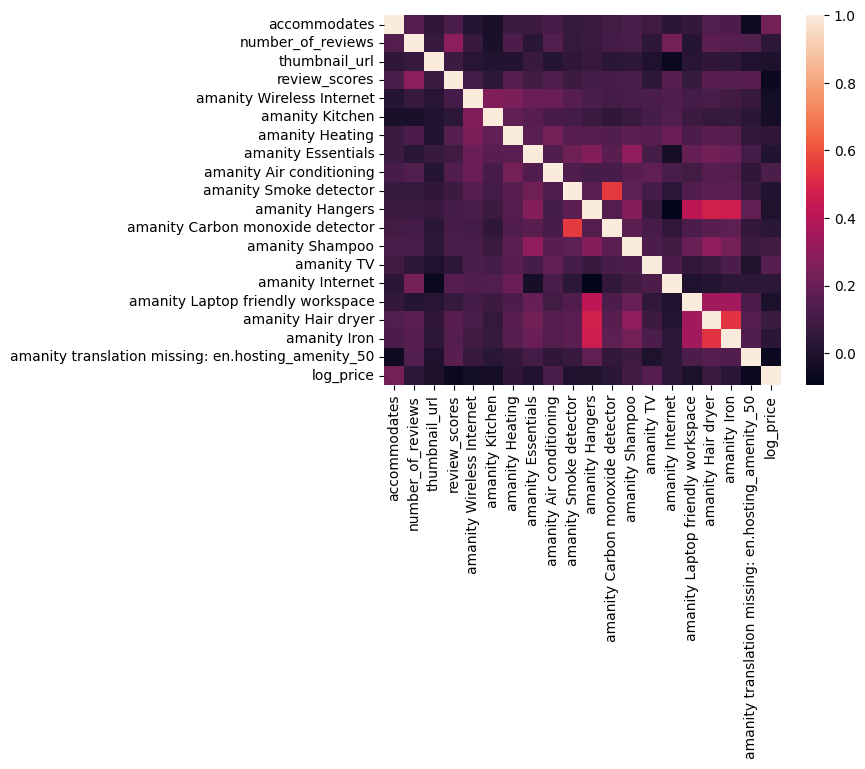

In [898]:
sns.heatmap(df_nyc_private[df_nyc_private.select_dtypes(include=['int64']).columns.tolist() + ['log_price']].corr())


# Modeling
Prepare data for modeling

### Transform data
Columns *cleaning_fee*, *host_identity_verified* ,*instant_bookable* transform from bool and object to 1/0 using encoding from pandas.


In [888]:
# df_nyc_private['cleaning_fee'] = df_nyc_private['cleaning_fee'].astype(int)
# df_nyc_private['host_identity_verified'] = df_nyc_private['host_identity_verified'].map({'t':1,'f':0})
# df_nyc_private['instant_bookable'] = df_nyc_private['instant_bookable'].map({'t':1,'f':0})

df_encoded = pd.get_dummies(df_nyc_private,columns=['cleaning_fee','host_identity_verified','instant_bookable'])


# Modeling

To determine how good the modeling perform scoring and comparing the results can be done. Since the price is numeric, given a prediction of price.